1. Create data for 3 or 4 classes.
- Use SVM to find the results.
- Manually doing binary classification with ovo or ovr (if you have enough time, do both).  Save the results for each binary classification so that you can do the prediction based on the voting over these numerous binary classifications in ovr and ovo.
- compare the results from steps 2 and 3.


4. user conceept of 'ovo' and 'ovr', manually separate dataset and perform SVM on individual datasets.

In [103]:
from timeit import default_timer as timer
import math
import json
import inspect
import concurrent.futures as cf  # doesn't work with sklearn
import pandas as pd
import numpy as np
import copy as copy
import statistics as stt
import seaborn as sns
sns.set_theme()
from os import system, getcwd, startfile
from os.path import join
from time import time
from scipy.io import arff
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter
%matplotlib inline

In [128]:
class ml_svm():
    def __init__(self, class_num=[3, 4], N=1000, SD=1, DIFF=7, show=False, plot=False, random_center=False):
        # in later version, class_num, N, SD, DIFF should not be included in __init__
        # store variables
        self.class_num = class_num
        self.N = N
        self.SD = SD
        self.DIFF = DIFF
        # generate data set
        np.random.seed(2019)
        self.center = []
        self.X = []
        self.y = []
        for i in self.class_num:
            # generate data by class number array length
            center = []
            X = []
            y = []
            if random_center:
                x_center = np.random.randn(i) * self.DIFF / 2
                y_center = np.random.randn(i) * self.DIFF / 2
            else:
                # data center is circled around the origin and distance is DIFF
                angle = np.arange(0, i, 1, dtype=float) * 360 / i
                x_center = np.around(
                    self.DIFF * np.cos(angle * math.pi / 180), decimals=2)
                y_center = np.around(
                    self.DIFF * np.sin(angle * math.pi / 180), decimals=2)
            for j in range(i):
                # generate data by class number array element value
                center.append([x_center[j], y_center[j]])
                x = np.random.randn(self.N, 2) * self.SD + center[-1]
                X.append(x)
                y.append(np.full(self.N, j))
            X = np.concatenate(X)
            y = np.concatenate(y)
            self.X.append(X)
            self.y.append(y)
            self.center.append(center)
        if show:
            print('center=', self.center)
            # print('X=', self.X)
            # print('y=', self.y)
        if plot:
            for i in range(len(self.class_num)):
                plt.scatter(self.X[i][:, 0], self.X[i][:, 1], c=self.y[i])
                plt.hlines(0, -self.DIFF * 1.5, self.DIFF * 1.5, linestyles='dashed')
                plt.vlines(0, -self.DIFF * 1.5, self.DIFF * 1.5, linestyles='dashed')
                plt.title('data of class_num=' + str(self.class_num[i]))
                plt.show()

    def run_svc(self, show=False, plot=False, C=1.0, gamma=0.01, decision_function_shape='ovr'):
        # run SVC
        result = {'acc': [], 'pre': [], 'rec': [], 'f1': []}
        for i in range(len(self.class_num)):
            svc = SVC(kernel='linear', C=C, gamma=gamma, decision_function_shape=decision_function_shape)
            svc.fit(self.X[i], self.y[i])
            y_pred = svc.predict(self.X[i])
            result['acc'].append(accuracy_score(self.y[i], y_pred))
            result['pre'].append(precision_score(
                self.y[i], y_pred, average='macro'))
            result['rec'].append(recall_score(self.y[i], y_pred, average='macro'))
            result['f1'].append(f1_score(self.y[i], y_pred, average='macro'))
            if show:
                print('class_num=', self.class_num[i])
                print('accuracy=', result['acc'][-1])
                print('precision=', result['pre'][-1])
                print('recall=', result['rec'][-1])
                print('f1=', result['f1'][-1])
            if plot:
                color = {0: 'red', 1: 'blue', 2: 'green', 3: 'yellow'}
                xcolor = [color[i] for i in self.y[i]]
                plt.scatter(self.X[i][:, 0], self.X[i][:, 1], c=xcolor)
                plt.hlines(0, -self.DIFF * 1.5, self.DIFF * 1.5, linestyles='dashed')
                plt.vlines(0, -self.DIFF * 1.5, self.DIFF * 1.5, linestyles='dashed')
                for j in range(self.class_num[i]):
                    GX = np.random.uniform(-self.DIFF *
                                           1.5, self.DIFF * 1.5, self.N)
                    GY = -1.0 * (svc.intercept_[j] + svc.coef_[j][0] * GX) / svc.coef_[j][1]
                    plt.plot(GX, GY, c=color[j])
                # plt.title('svm of class_num=' + str(self.class_num[i]))
                plt.title(
                    'svm of class_num={0}, decision_function_shape={1}'.format(str(self.class_num[i]), decision_function_shape))
                # plt.title('svm ({0}) result of class_num={1}'.format(
                #     inspect.signature(self.run_svc), str(self.class_num[i])))
                # signature
                # getfullargspec
                plt.xlim(-self.DIFF * 1.5, self.DIFF * 1.5)
                plt.ylim(-self.DIFF * 1.5, self.DIFF * 1.5)
                plt.show()



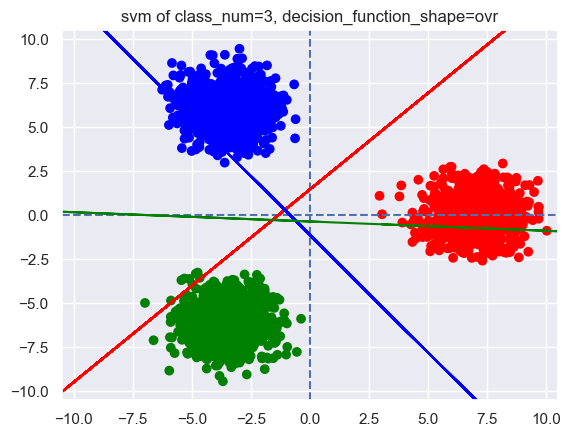

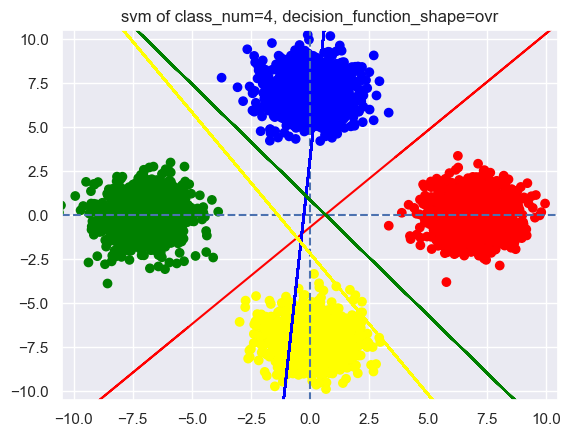

In [117]:
q1 = ml_svm(show=False, plot=False)
q1.run_svc(show=False, plot=True)


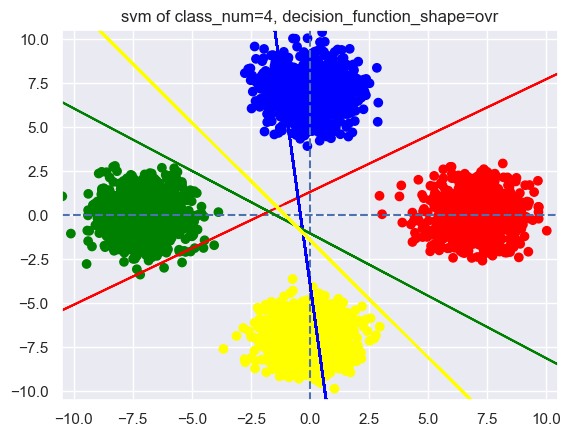

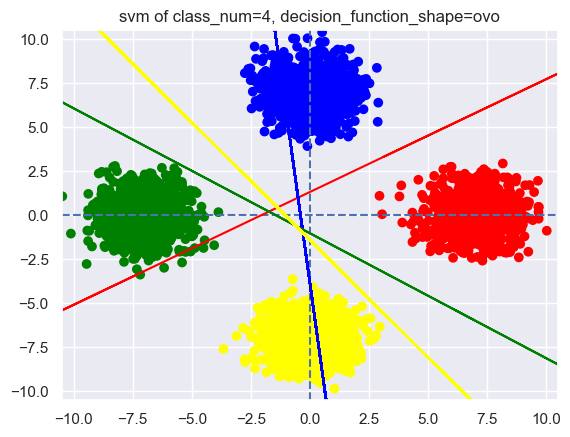

In [122]:
q2 = ml_svm(class_num=[4])
q2.run_svc(plot=True, decision_function_shape='ovr')
q2.run_svc(plot=True, decision_function_shape='ovo')


class_num= 4
accuracy= 0.77875
precision= 0.7771710904131655
recall= 0.77875
f1= 0.7778197117104431


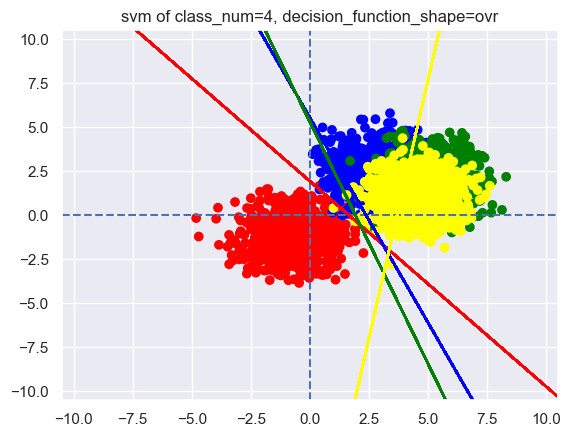

class_num= 4
accuracy= 0.77875
precision= 0.7771710904131655
recall= 0.77875
f1= 0.7778197117104431


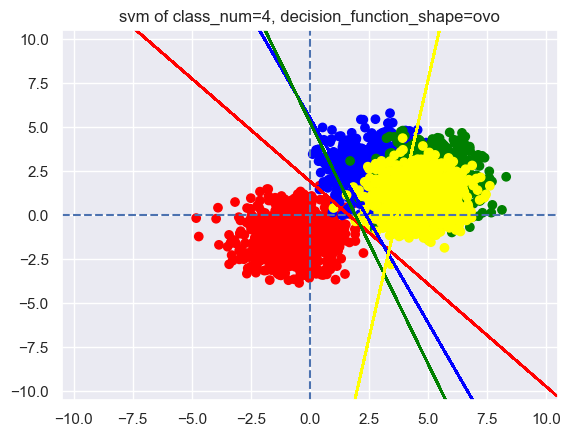

In [130]:
q2 = ml_svm(class_num=[4], DIFF=7, random_center=True)
q2.run_svc(show=True, plot=True, decision_function_shape='ovr')
q2.run_svc(show=True, plot=True, decision_function_shape='ovo')
